# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
    

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()

#display(response_data_btc)
my_btc_value = response_data_btc['data']['1']['quotes']['CAD']['price']
print(my_btc_value)

22484.66935


In [6]:
# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()
my_eth_value = response_data_eth['data']['1027']['quotes']['CAD']['price']
print(my_eth_value)

1590.626895


In [7]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22484.67
The current value of your 5.3 ETH is $1590.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_spy = 110
my_agg = 200
# Set current amount of shares data
shares_data = {
    "shares": [200, 320]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


,shares
SPY,200
AGG,320


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-12-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_portfolio

AGG                                             \
                           open   high    low  close    volume trade_count   
timestamp                                                                    
2022-12-01 05:00:00+00:00  98.3  98.89  98.17  98.88  12463606       46447   

                                         SPY                                   \
                                vwap    open   high     low   close    volume   
timestamp                                                                       
2022-12-01 05:00:00+00:00  98.544079  408.77  410.0  404.75  407.38  76270288   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-12-01 05:00:00+00:00      599125  407.368696

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].values
spy_close_price = df_portfolio["SPY"]["close"].values

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[98.88]
Current SPY closing price: $[407.38]


In [12]:
# Compute the current value of shares
my_spy_value = df_portfolio["SPY"]["open"].values
my_agg_value = df_portfolio["AGG"]["open"].values

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")


The current value of your 110 SPY shares is $[408.77]
The current value of your 200 AGG shares is $[98.3]


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = {
    "amount": [20000, 40000]
}
tickers = ["crypto", "shares"]
# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,20000
shares,40000


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

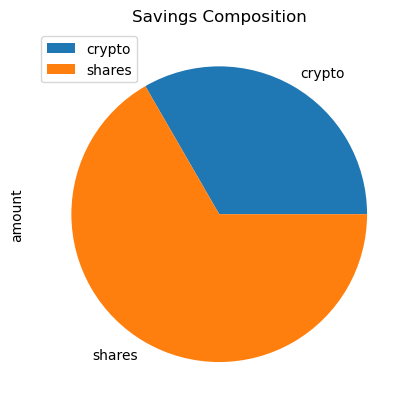

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Savings Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
display(emergency_fund)
# Calculate total amount of savings
current_savings = df_savings["amount"].sum()
display(current_savings)


36000

60000

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
tickers = ['AGG', 'SPY']

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500,  ##What is Num Simulation???
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_Thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 110.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 120.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 130.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 140.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 150.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 160.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 170.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 180.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 190.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 200.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 210.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 220.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 230.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 240.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 250.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 260.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 270.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 280.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 290.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 300.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 310.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 320.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 330.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 340.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 350.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 360.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 370.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 380.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 390.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 400.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 410.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 420.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 430.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 440.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 450.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 460.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 470.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 480.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 490.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998225,0.997630,0.998396,1.007883,0.998415,0.991173,1.001203,0.998335,0.984688,0.997635,...,0.990740,1.006995,1.007691,0.992988,1.000868,0.999710,1.006306,0.999843,1.004451,1.004089
2,0.996072,0.990784,0.991429,1.007760,1.004518,0.997420,0.998956,0.989535,0.985342,0.998594,...,0.996065,0.997938,1.001082,0.997762,1.004716,1.009822,1.005033,1.009162,1.002462,1.008282
3,0.993033,1.011322,0.987395,0.994476,1.009174,1.010596,0.995742,0.997638,0.981059,1.006130,...,0.990206,0.999712,1.007413,1.001011,1.013027,0.996259,1.008075,1.007782,1.001239,1.005859
4,0.990380,1.019090,0.990585,0.989797,1.015015,1.018819,1.002629,1.010017,0.977640,1.018203,...,0.987885,1.002126,1.010414,0.999836,1.014997,0.999980,1.001162,0.997473,1.004960,1.009997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.705330,22.080544,10.276544,5.177701,7.344328,13.082191,13.692337,16.657906,6.743159,18.079691,...,11.916531,16.630626,6.728241,11.663051,7.566494,17.516968,5.053203,6.604457,14.882123,15.002408
7557,7.668462,22.196122,10.247227,5.190507,7.356394,13.069596,13.751477,16.712128,6.704048,17.931359,...,11.949425,16.714174,6.757439,11.503421,7.617453,17.490284,5.008209,6.600853,14.860923,15.039447
7558,7.614224,22.063074,10.327845,5.221229,7.292439,13.146811,13.669492,16.596292,6.721230,17.911775,...,12.025324,16.699417,6.783221,11.655691,7.621272,17.451499,5.006194,6.586203,14.937101,15.042848
7559,7.665155,22.070666,10.451320,5.251166,7.293201,13.109386,13.697888,16.698543,6.704055,18.066734,...,11.954056,16.664125,6.791014,11.663016,7.645799,17.442169,4.965528,6.572126,15.089067,14.900816


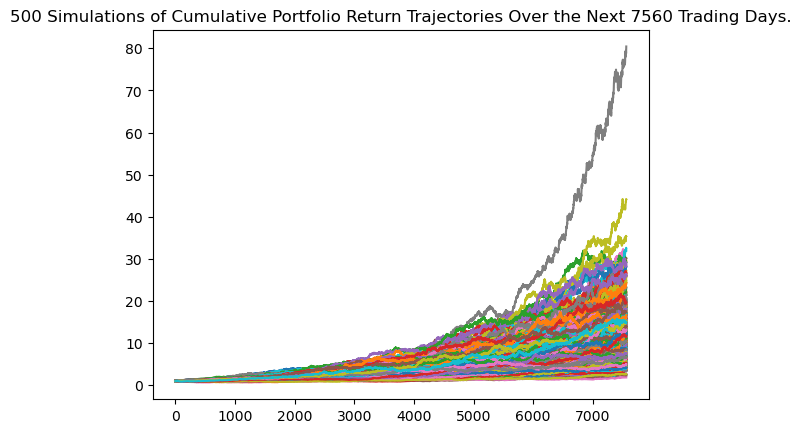

In [21]:
# Plot simulation outcomes
AGG_SPY_line_plot = MC_Thirty_year.plot_simulation()

# Saving the plot for future usage
AGG_SPY_line_plot.get_figure().savefig('MC_Thirty_year_sim_plot.png',bbox_inches='tight')

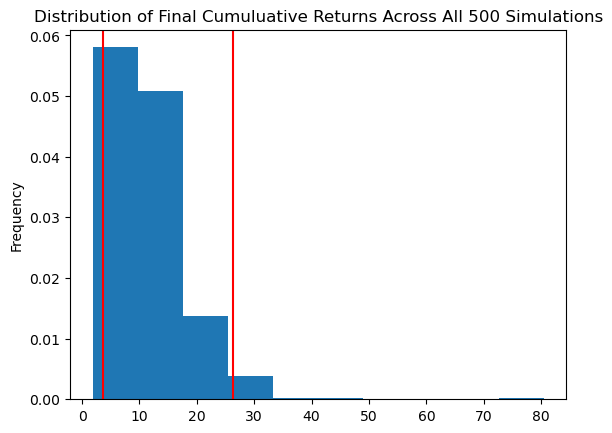

In [22]:
# Plot probability distribution and confidence intervals
AGG_SPY_dist_plot = MC_Thirty_year.plot_distribution()

# Saving the plot for future usage
AGG_SPY_dist_plot.get_figure().savefig('MC_Thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistic = MC_Thirty_year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistic)

count           500.000000
mean             11.531591
std               6.663275
min               1.866854
25%               6.802938
50%              10.403234
75%              14.740958
max              80.435425
95% CI Lower      3.576349
95% CI Upper     26.366929
Name: 7560, dtype: float64


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistic[8]*20000,2) ##How does thsi formulae work
ci_upper = round(summary_statistic[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71526.98 and $527338.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistic[8]*(20000*1.5),2) ##How does thsi formulae work
ci_upper = round(summary_statistic[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107290.47 and $791007.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500, 
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 140.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 210.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 220.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 270.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 280.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 290.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 300.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 310.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 320.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 330.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 340.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 350.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 360.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 370.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 380.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 390.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 460.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 470.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 480.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 490.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002224,1.012848,1.000306,1.008227,0.996611,1.000075,1.003500,0.999327,1.007103,1.002023,...,0.996897,1.006656,1.006363,1.004925,0.992431,0.998380,0.998573,1.009573,1.000244,1.005338
2,1.004872,1.011737,0.994017,1.013654,0.993661,0.995225,0.999693,1.002745,1.015515,1.004922,...,1.002124,1.008347,1.008519,1.010658,0.992538,1.004119,0.998306,1.006947,0.995084,1.006108
3,1.005171,1.013049,0.992310,1.028170,0.985300,0.998286,0.995139,1.013165,1.020673,1.005875,...,0.993760,1.014835,1.003826,1.012272,0.994035,1.010672,1.001629,0.999623,1.003591,1.006160
4,1.009027,1.012997,0.989342,1.033973,0.986511,0.990728,0.999773,1.014010,1.016316,1.008092,...,0.987289,1.022902,1.010261,1.014007,0.990406,1.005790,0.999839,0.998814,0.999764,1.007571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.822893,1.511462,1.807253,1.162389,1.444288,1.545378,1.205025,1.647309,1.347438,1.350944,...,1.941215,2.122173,1.406512,1.551271,1.612618,1.593706,1.251823,1.625984,2.053756,1.186730
1257,1.810427,1.499201,1.814792,1.161818,1.449462,1.549144,1.198340,1.629821,1.346331,1.368750,...,1.928767,2.127627,1.409037,1.545467,1.615085,1.596232,1.254296,1.617375,2.044587,1.194315
1258,1.804759,1.507892,1.833769,1.152053,1.453607,1.535681,1.197758,1.629559,1.355288,1.378428,...,1.940298,2.143128,1.402632,1.540621,1.625553,1.595870,1.260021,1.622336,2.046985,1.194777
1259,1.803603,1.509850,1.833354,1.154538,1.454416,1.533372,1.204066,1.620677,1.350072,1.392518,...,1.936009,2.148835,1.404072,1.530783,1.609734,1.595895,1.266023,1.626553,2.069061,1.199753


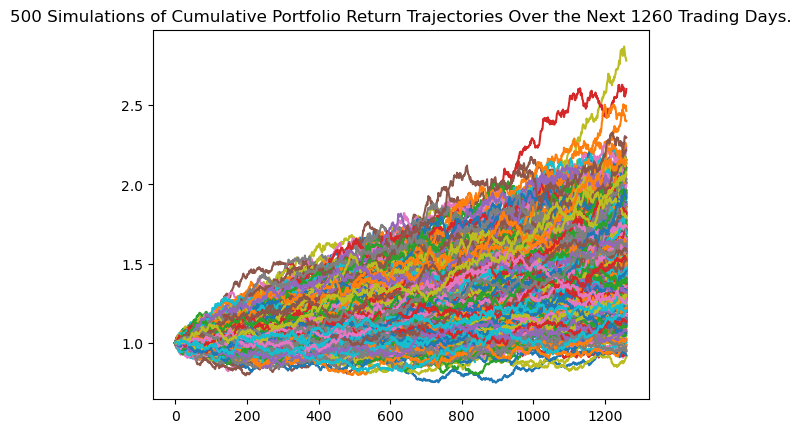

In [28]:
# Plot simulation outcomes
fiveyears_line_plot = MC_fiveyear.plot_simulation()

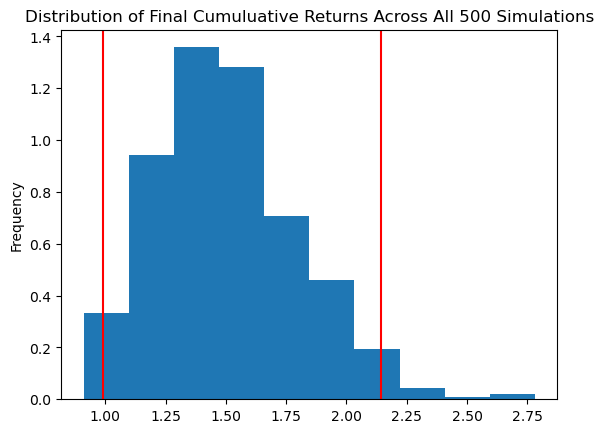

In [29]:
# Plot probability distribution and confidence intervals
fiveyears_dist_plot = MC_fiveyear.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_summary_statistic = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_summary_statistic)

count           500.000000
mean              1.507801
std               0.298906
min               0.911325
25%               1.300518
50%               1.478471
75%               1.691613
max               2.781236
95% CI Lower      0.990740
95% CI Upper      2.144158
Name: 1260, dtype: float64


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [31]:
# Set initial investment
initial_investment = 5000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyear_summary_statistic[8]*5000,2)
ci_upper_five = round(fiveyear_summary_statistic[9]*500,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $5000 in the portfolio over the next 5 years will end within in the range of $4953.7 and $1072.08


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500, 
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 110.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 120.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 130.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 140.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 150.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 160.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 170.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 180.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 190.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 200.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 210.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 220.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 230.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 240.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 250.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 260.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 270.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 280.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 290.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 300.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 310.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 320.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 330.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 340.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 350.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 360.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 370.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 380.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 390.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 400.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 410.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 420.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 430.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 440.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 450.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 460.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 470.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 480.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

Running Monte Carlo simulation number 490.


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999862,0.996373,0.995572,1.017081,0.998869,1.004124,0.994994,1.006233,0.989472,1.006778,...,0.990132,0.999800,1.016306,0.993604,0.993623,0.998549,1.001437,1.002945,0.994472,0.993465
2,0.993428,0.997797,0.988287,1.015152,1.005939,1.015157,0.997277,0.999609,0.988005,1.006033,...,0.995268,1.002540,1.021244,0.994386,0.996905,0.998523,1.001874,0.991696,0.987190,0.990934
3,1.001335,0.994429,0.979198,1.009556,1.014266,1.012065,0.998427,1.001692,0.981528,0.997418,...,1.004572,1.007394,1.019066,0.993800,1.005286,0.997025,1.007451,0.996865,0.983121,0.996741
4,0.996025,1.001645,0.973090,1.007591,1.014658,1.016045,1.003677,1.000116,0.979061,0.987975,...,1.009841,1.008447,1.017709,0.999722,1.005626,0.991051,1.004138,1.003913,0.991956,0.991013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.373293,3.645069,3.168987,1.941416,1.700514,2.022765,1.758841,2.385847,3.586536,2.647500,...,2.296657,3.761793,2.102553,1.449172,4.226456,2.746737,3.109118,1.188342,1.194396,2.421485
2517,2.369097,3.616030,3.121843,1.921366,1.714749,1.997983,1.763895,2.393274,3.547441,2.671262,...,2.294180,3.712243,2.096979,1.449282,4.207991,2.745045,3.091647,1.194887,1.202924,2.438591
2518,2.397304,3.647340,3.094263,1.924821,1.713710,2.012137,1.755395,2.370427,3.564653,2.698339,...,2.301948,3.717587,2.103978,1.460954,4.218152,2.747675,3.086424,1.195237,1.201979,2.440297
2519,2.415262,3.671939,3.094830,1.931254,1.710525,2.024732,1.748272,2.390558,3.522721,2.697590,...,2.297582,3.714180,2.086603,1.453509,4.215694,2.712232,3.115333,1.196402,1.189036,2.437755


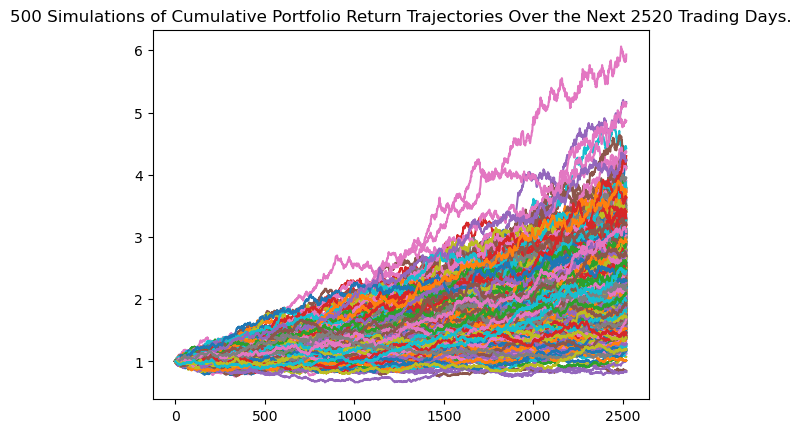

In [34]:
# Plot simulation outcomes
tenyears_line_plot = MC_tenyear.plot_simulation()

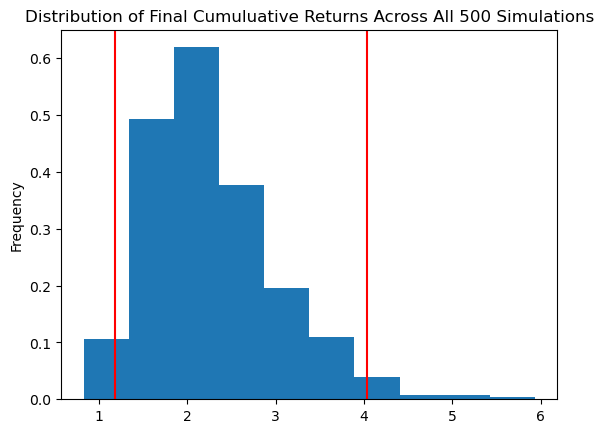

In [35]:
# Plot probability distribution and confidence intervals
tenyears_dist_plot = MC_tenyear.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_summary_statistics = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tenyear_summary_statistics)

count           500.000000
mean              2.276785
std               0.730604
min               0.829425
25%               1.755852
50%               2.186534
75%               2.650436
max               5.932525
95% CI Lower      1.179111
95% CI Upper      4.033211
Name: 2520, dtype: float64


C:\Users\61415\Fintech-Bootcamp\Week-5\MONU-VIRT-FIN-PT-11-2022-U-LOLC\Homework\05-APIs\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [37]:
# Set initial investment
initial_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyear_summary_statistics[8]*25000,2)
ci_upper_ten = round(tenyear_summary_statistics[9]*25000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 10 years will end within in the range of $29477.77 and $100830.27
